In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_preprocessing_utilities as dp
import data_eda_utilities as de

In [2]:
df_fleets = pd.read_csv("../Data/Fleet Data.csv")
dp.print_head(df_fleets)

    Parent Airline          Airline Aircraft Type  Current  Future  Historic  \
0  Aegean Airlines  Aegean Airlines   Airbus A319      1.0     NaN       3.0   
1  Aegean Airlines      Olympic Air   Airbus A319      NaN     NaN       8.0   
2  Aegean Airlines  Aegean Airlines   Airbus A320     38.0     NaN       3.0   
3  Aegean Airlines      Olympic Air   Airbus A320      NaN     NaN       9.0   
4  Aegean Airlines  Aegean Airlines   Airbus A321      8.0     NaN       NaN   

   Total  Orders Unit Cost Total Cost (Current)  Average Age  
0    4.0     NaN       $90                  $90         11.6  
1    8.0     NaN       $90                   $0          NaN  
2   41.0     NaN       $98               $3,724          7.5  
3    9.0     NaN       $98                   $0          NaN  
4    8.0     NaN      $115                 $919         10.3  


In [3]:
dp.print_shape(df_fleets)

No of rows = 1583 , No of columns = 11


In [4]:
dp.print_null_count(df_fleets)

Parent Airline             0
Airline                    0
Aircraft Type              0
Current                  724
Future                  1395
Historic                 470
Total                     99
Orders                  1235
Unit Cost                 35
Total Cost (Current)      27
Average Age              763
dtype: int64


In [5]:
df_fleets.drop('Future', axis=1, inplace=True)
df_fleets.drop('Orders', axis=1, inplace=True)
df_fleets.drop('Total', axis=1, inplace=True)
df_fleets.drop('Total Cost (Current)', axis=1, inplace=True)

df_fleets['Unit Cost'].replace('\$','',regex=True,inplace=True)

df_fleets['Unit Cost'].replace('\,','',regex=True,inplace=True)

df_fleets['Unit Cost']=df_fleets['Unit Cost'].astype(float)

df_fleets['Current'] = df_fleets['Current'].fillna(0)
df_fleets['Current'] = df_fleets.groupby('Aircraft Type')['Current'].transform(lambda x: x.fillna(x.mean()))

df_fleets['Historic'] = df_fleets['Historic'].fillna(0)
df_fleets['Historic'] = df_fleets.groupby('Aircraft Type')['Historic'].transform(lambda x: x.fillna(x.mean()))

df_fleets['Average Age'] = df_fleets.groupby('Aircraft Type')['Average Age'].transform(lambda x: x.fillna(x.mean()))
df_fleets = df_fleets.groupby('Aircraft Type').filter(lambda x: x['Average Age'].notna().any())

df_fleets['Unit Cost'] = df_fleets.groupby('Aircraft Type')['Unit Cost'].transform(lambda x: x.fillna(x.mean()))

df_fleets.dropna(subset=['Unit Cost'], inplace=True)

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\,'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\,'
/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91490/1910322242.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_fleets['Unit Cost'].replace('\$','',regex=True,inplace=True)
/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91490/1910322242.py:8: SyntaxWarning: invalid escape sequence '\,'
  df_fleets['Unit Cost'].replace('\,','',regex=True,inplace=True)
/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91490/1910322242.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [6]:
dp.print_dtypes(df_fleets)

Parent Airline     object
Airline            object
Aircraft Type      object
Current           float64
Historic          float64
Unit Cost         float64
Average Age       float64
dtype: object


In [7]:
dp.summarize_data(df_fleets, columns=['Current', 'Historic', 'Unit Cost', 'Average Age'], stats=['mean', 'median', 'std', 'IQR', 'range', 'min', 'max'])

*********** Dataset summary of numerical columns ***********
             min    max  range        mean  median        std         IQR
Current      0.0  718.0  718.0   14.616052     4.0  33.897576   16.000000
Historic     0.0  325.0  325.0   10.288503     4.0  21.137923   11.000000
Unit Cost    7.0  433.0  426.0  124.964930    90.0  95.314957  139.500000
Average Age  0.1   39.0   38.9   13.101451    11.2   8.443044   12.591176


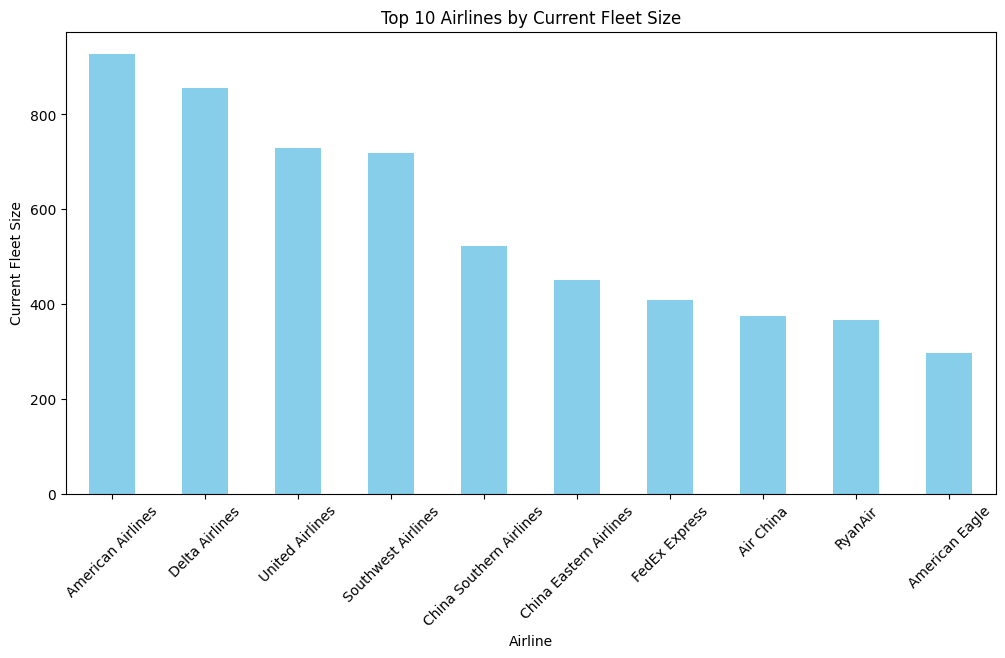

In [8]:
# Visualisations
plt.figure(figsize=(12,6))
df_fleets.groupby('Airline')['Current'].sum().nlargest(10).plot(kind='bar', color='skyblue')
plt.xlabel("Airline")
plt.ylabel("Current Fleet Size")
plt.title("Top 10 Airlines by Current Fleet Size")
plt.xticks(rotation=45)
plt.show()

# Delta Airlines has the largest fleet, followed closely by American Airlines and United Airlines, indicating dominance in commercial aviation

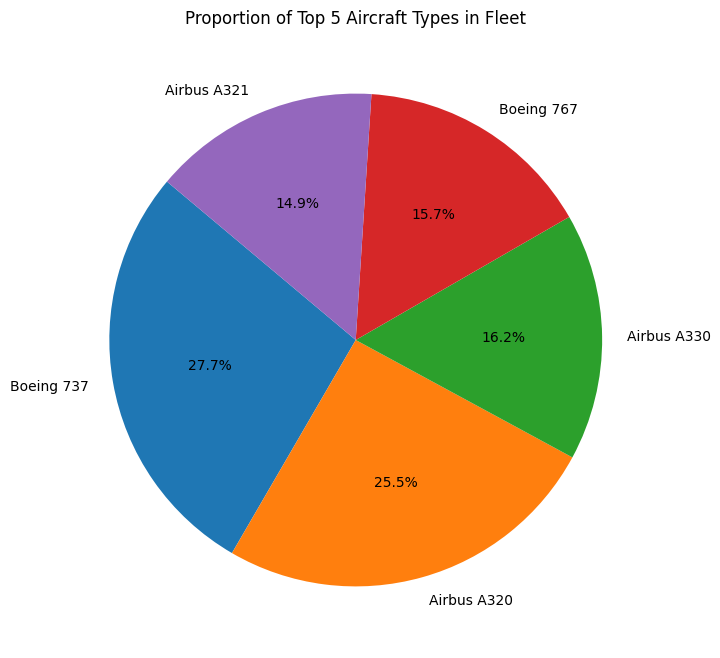

In [9]:
top_aircraft = df_fleets['Aircraft Type'].value_counts().nlargest(5)
plt.figure(figsize=(8,8))
top_aircraft.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title("Proportion of Top 5 Aircraft Types in Fleet")
plt.show()

# Boeing 737 and Airbus A320 make up the majority of the fleet, showing preference for efficient, high-capacity aircraft.

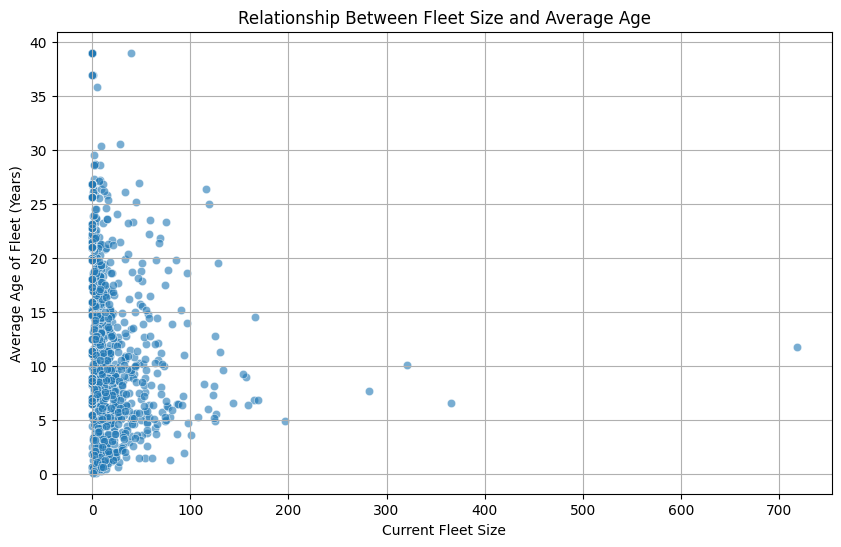

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_fleets, x='Current', y='Average Age', alpha=0.6)
plt.xlabel("Current Fleet Size")
plt.ylabel("Average Age of Fleet (Years)")
plt.title("Relationship Between Fleet Size and Average Age")
plt.grid()
plt.show()

# No clear correlation, but older fleets tend to have smaller sizes, suggesting newer aircraft dominate larger fleets.

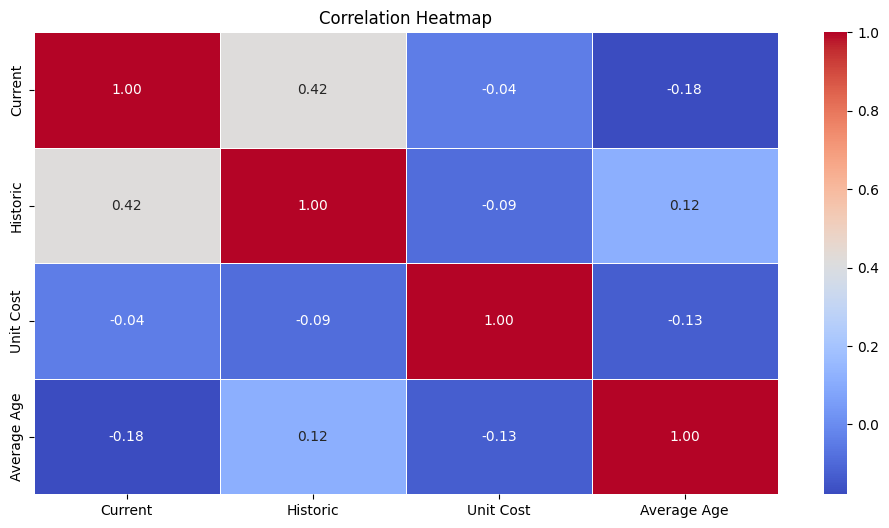

In [11]:
de.draw_correlation_heatmap(df_fleets)

Skewness:
 Current        9.273387
Historic       6.466942
Unit Cost      0.970394
Average Age    0.772179
dtype: float64


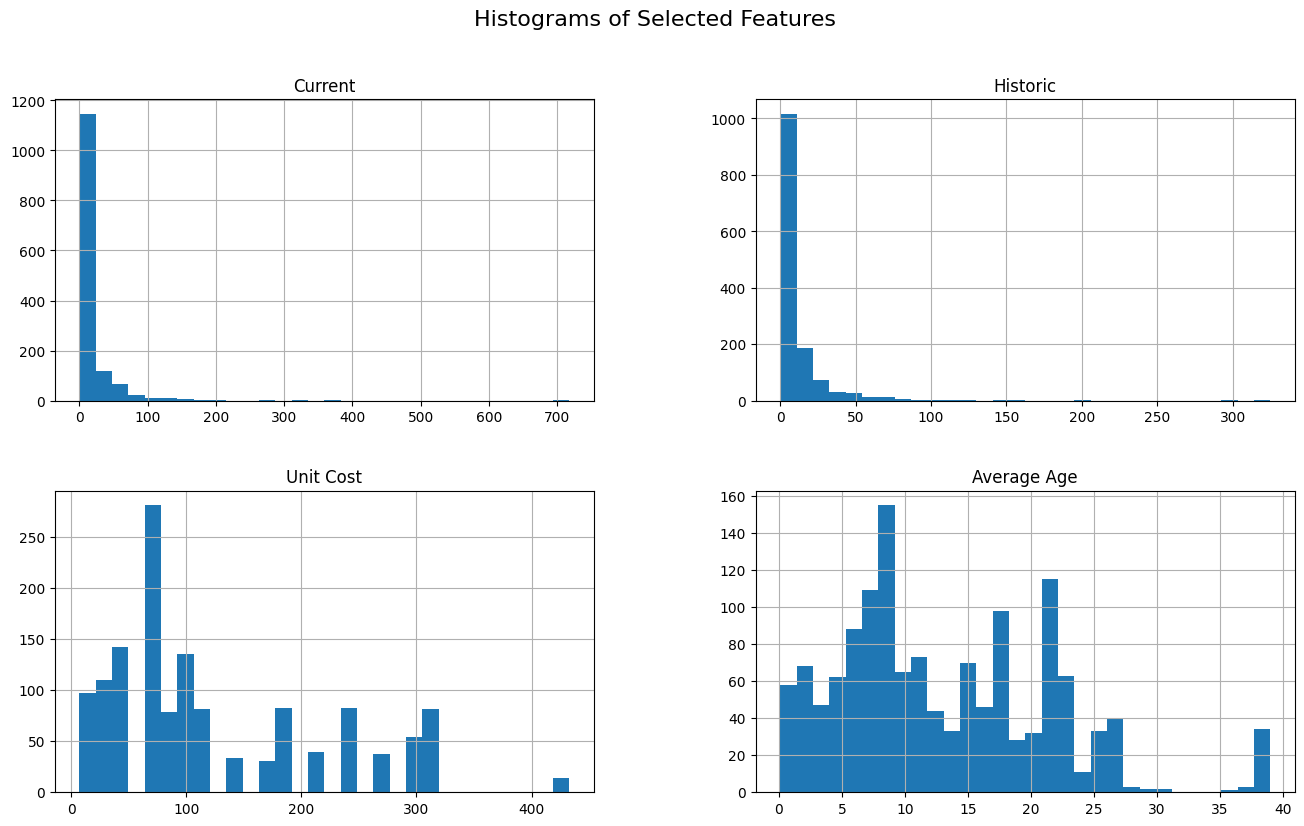

In [12]:
selected_cols = ['Current', 'Historic', 'Unit Cost', 'Average Age']
de.draw_skewness_histogram(df_fleets, selected_cols=selected_cols)

In [13]:
num_cols = ['Current', 'Historic', 'Unit Cost', 'Average Age']

de.print_outliers(df_fleets, num_cols=num_cols)

df_fleets = de.cap_outliers(df_fleets, 'Current')
df_fleets = de.cap_outliers(df_fleets, 'Historic')
df_fleets = de.cap_outliers(df_fleets, 'Unit Cost')
df_fleets = de.cap_outliers(df_fleets, 'Average Age')

print()

de.print_outliers(df_fleets, num_cols=num_cols)

Current: 142 outliers detected (10.27%)
Historic: 131 outliers detected (9.47%)
Unit Cost: 14 outliers detected (1.01%)
Average Age: 34 outliers detected (2.46%)

Current: 0 outliers detected (0.0%)
Historic: 0 outliers detected (0.0%)
Unit Cost: 0 outliers detected (0.0%)
Average Age: 0 outliers detected (0.0%)


In [14]:
num_cols = ['Current', 'Historic', 'Unit Cost', 'Average Age']
df_fleets[num_cols] = de.scale_df(df_fleets, selected_columns=num_cols, type='scalar')

In [15]:
df_fleets.to_csv("../Data/Fleet Data.csv")